In [98]:
# 1. There is some bug due to whoch only 400 class of objects are being mapped to word2vec embedding, 
#try to fix this after working on first version


In [1]:
%matplotlib inline
import importlib

In [2]:
import utils2; importlib.reload(utils2)
from utils2 import *

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from bcolz_array_iterator import BcolzArrayIterator
from tqdm import tqdm

In [5]:
limit_mem()

In [6]:
path = '/home/ubuntu/nbs/dataset/train/'
dpath = '/home/ubuntu/nbs/dataset/'

In [7]:
from gensim.models import word2vec

In [11]:
w2v_path = '/home/ubuntu/nbs/dataset/GoogleNews-vectors-negative300'

In [6]:
# Converting word vector's from bin format to txt format
model = word2vec.KeyedVectors.load_word2vec_format(w2v_path+'.bin', binary = True)
model.save_word2vec_format(w2v_path+'.txt', binary=False)

In [7]:
import numpy as np
import pickle
def parse_w2v(l):
    i=l.index(' ')
    return l[:i], np.fromstring(l[i+1:-2], 'float32', sep=' ')

In [12]:
# with io.open(w2v_path+'.txt', "r", encoding="utf-8") as my_file:
lines = open(w2v_path+'.txt', "r", encoding="utf-8").readlines()

In [13]:
lines[3]

'for -0.011780 -0.047363 0.044678 0.063477 -0.018188 -0.063965 -0.001312 -0.072266 0.064453 0.086426 -0.169922 -0.039795 0.071289 -0.025879 0.018188 0.136719 0.144531 -0.033691 -0.097656 -0.120117 -0.079590 0.062500 -0.066895 0.074219 0.022705 0.033447 -0.180664 0.052002 0.013855 0.092773 0.003510 -0.009094 -0.097168 0.067871 -0.008789 0.044189 -0.133789 -0.099609 0.033203 0.027954 0.155273 -0.017700 0.014282 -0.109863 -0.085449 -0.073242 -0.024658 0.172852 0.061768 0.089355 -0.024292 0.141602 -0.032959 0.027466 -0.155273 0.007874 -0.070801 0.043701 0.006012 -0.055908 -0.147461 0.028442 -0.132812 -0.176758 -0.091309 -0.050781 -0.026001 -0.148438 -0.080566 0.150391 -0.043457 0.079102 0.033203 0.090332 0.022705 -0.062500 0.164062 0.085938 -0.012390 0.196289 -0.062256 0.022461 -0.030151 0.021240 0.003326 -0.055420 -0.073242 0.029785 0.049805 0.017456 0.104492 0.038818 0.084961 -0.248047 0.069336 -0.149414 0.058350 0.095703 -0.033447 0.062988 0.021362 -0.145508 0.053711 -0.090820 -0.025391

In [12]:
w2v_list = list(map(parse_w2v, lines[1:]))

In [40]:
pickle.dump(w2v_list, open(path+'../w2vl.pkl', 'wb'))

In [14]:
w2v_list = pickle.load(open(path+'../w2vl.pkl', 'rb'))

In [15]:
w2v_dict = dict(w2v_list)

In [16]:
words,vectors = zip(*w2v_list)

In [17]:
np.corrcoef(w2v_dict['bill'], w2v_dict['BILL'])

array([[ 1.        ,  0.27939364],
       [ 0.27939364,  1.        ]])

In [18]:
# Create Reverse mapping from lower cased word to embedding's
lc_w2v = {w.lower().replace("_"," "): w2v_dict[w] for w in reversed(words)}

In [64]:
# LOL no embedding exist's for lc_w2v["aalekh"]

In [19]:
fpath = '/home/ubuntu/nbs/dataset/imagenet_class_index.json' # Remember to add all these files, I am providing path to

In [20]:
class_dict = json.load(open(fpath))

In [21]:
nclass = len(class_dict);

In [209]:
# class_dict

In [208]:
classids_1k = dict(class_dict.values());

In [24]:
classid_lines = open(dpath+'words.txt', 'r').readlines()

In [25]:
classids = dict(l.strip().split('\t') for l in classid_lines)

In [207]:
# classids

In [27]:
len(classids); classids['n00187056']

'bowling score'

In [28]:
syn_wv = [(k, lc_w2v[v.lower().replace('_', " ")]) for k,v in classids.items()
         if v.lower().replace('_', " ") in lc_w2v]

In [29]:
syn_wv_1k = [(k, lc_w2v[v.lower().replace("_"," ")]) for k,v in classids_1k.items()
            if v.lower().replace("_", " ") in lc_w2v]

In [30]:
syn2wv = dict(syn_wv); len(syn2wv)

27456

In [31]:
len(syn_wv_1k)

774

In [32]:
# class_dict
nomatch = [v[0] for v in class_dict.values() if v[0] not in syn2wv];len(nomatch)

600

In [206]:
nm_path=path+'train_nm/';

In [34]:
os.mkdir(nm_path)

FileExistsError: [Errno 17] File exists: '/home/ubuntu/nbs/dataset/train/train_nm/'

In [94]:
for nm in nomatch: 
    try:
        os.rename(path+nm, nm_path+nm)
    except FileNotFoundError:
        continue

In [35]:
matched = [v[0] for v in class_dict.values() if v[0] in syn2wv];

In [36]:
len(matched)

400

In [37]:
fnames = list(glob.iglob(path+'*/*.JPEG'))

In [38]:
pickle.dump(fnames, open(dpath+'fnames.pkl', 'wb'))

In [39]:
fnames = pickle.load(open(dpath + 'fnames.pkl', 'rb'))

In [40]:
fnames = np.random.permutation(fnames)

In [41]:
pickle.dump(fnames, open(dpath+'fnames_r.pkl', 'wb'))

In [42]:
fnames = pickle.load(open(dpath+'fnames_r.pkl', 'rb'))

In [43]:
new_s = 224 # Since we are using ResNET we need to resize images to 224 
n = len(fnames); n

10001

In [44]:
# There needs to be a correction next time you run a notebook: i.e; remove 'backslash' after dpath
bc_path = f'{dpath}/results/trn_resized_{new_s}_r.bc'
mid_path = f'{dpath}/results/features_mid_1c_r.bc'
last_path = f'{dpath}/results/features_last_1c_r.bc'

In [45]:
# Applying Centre Cropping
def _resize(img):
    shortest = min(img.width, img.height)
    resized = np.round(np.multiply(new_s/shortest, img.size)).astype(int)
    return img.resize(resized, Image.BILINEAR)

In [46]:
def resize_img(i):
    img = Image.open(fnames[i])
    s = np.array(img).shape
    if len(s) != 3 or s[2]!=3:
        return
    return _resize(img)

In [47]:
def resize_img_bw(i):
    return _resize(Image.open(fnames[i]).convert('L')) # convert('L') convert's to black and white (1 channel)

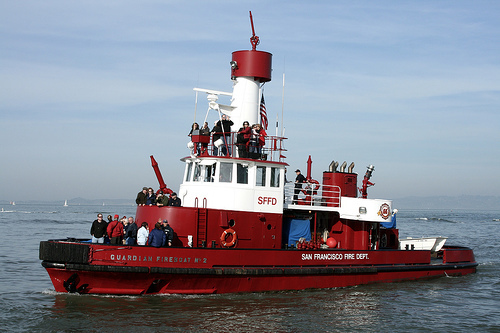

In [53]:
Image.open(fnames[0])

In [54]:
t1 = threading.local()

In [55]:
t1.place = np.zeros((new_s, new_s, 3), 'uint8')

In [62]:
arr = bcolz.carray(np.empty((0, new_s, new_s, 3), 'float32'),
                  chunklen=16, mode='w',rootdir = bc_path)

In [63]:
arr

carray((0, 224, 224, 3), float32)
  nbytes := 0; cbytes := 9.19 MB; ratio: 0.00
  cparams := cparams(clevel=5, shuffle=1, cname='lz4', quantize=0)
  chunklen := 16; chunksize: 9633792; blocksize: 0
  rootdir := '/home/ubuntu/nbs/dataset//results/trn_resized_224_r.bc'
  mode    := 'w'
[]

In [64]:
def get_slice(p, n): return slice((p-n+1)//2, p-(p-n)//2)

In [65]:
def app_img(r):
    t1.place[:] = (np.array(r)[get_slice(r.size[1], new_s), get_slice(r.size[0], new_s)]
                  if r else 0.)
    arr.append(t1.place)

In [66]:
for i in range(len(fnames)): app_img(resize_img(i))
arr.flush()

In [134]:
# Write a parallel version of above serial 
# step = 6400
# for i in tqdm(range(0, n, step))

In [67]:
arr = bcolz.open(bc_path)

In [68]:
len(arr)

10001

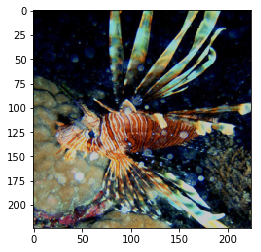

In [69]:
plt.imshow(arr[5].astype('uint8'))

In [70]:
arr.size
## Creating Model 

1505430528

In [71]:
def getSynset(f): return f[f.rfind('/')+1:f.find('_')]

In [72]:
labels = list(map(getSynset, fnames))

In [74]:
labels[0]; len(labels)

10001

In [77]:
vecs = np.stack([syn2wv[l] for l in labels]); vecs.shape

(10001, 300)

In [78]:
vecs[0]

array([ 0.227539  ,  0.206055  ,  0.049805  ,  0.054443  ,  0.057373  ,
       -0.48046899, -0.18652301, -0.076172  ,  0.24804699, -0.13964801,
        0.44921899, -0.146484  ,  0.006439  , -0.29101601,  0.107422  ,
        0.24804699, -0.131836  , -0.265625  ,  0.09082   ,  0.15820301,
       ..., -0.48828101, -0.112305  ,  0.071777  , -0.090332  ,
        0.070801  ,  0.168945  ,  0.051514  , -0.17675801,  0.44140601,
        0.36914101, -0.023682  , -0.64453101, -0.063965  , -0.123047  ,
        0.002869  , -0.26171899, -0.238281  , -0.30078101,  0.056885  ,
       -0.11718   ], dtype=float32)

In [79]:
# For ResNET model, we need to normalize as:
rn_mean = np.array([123.68, 116.779, 103.939], dtype = np.float32).reshape((1, 1, 3));rn_mean

array([[[ 123.68000031,  116.77899933,  103.93900299]]], dtype=float32)

In [80]:
inp = Input((224, 224, 3)) #Input layer, resnet requires 224*224 input

In [81]:
preproc = Lambda(lambda x: (x-rn_mean)[:, :, :, ::-1])(inp)
model = ResNet50(include_top=False, input_tensor=preproc)

In [82]:
mid_start = model.get_layer('res5b_branch2a')
mid_out = model.layers[model.layers.index(mid_start)-1]
shp = mid_out.output_shape; shp

(None, 7, 7, 2048)

In [83]:
rn_top = Model(model.input, mid_out.output)
rn_top_avg = Sequential([rn_top, AveragePooling2D((7, 7))])
shp = rn_top_avg.output_shape; shp

(None, 1, 1, 2048)

In [84]:
features_mid = bcolz.carray(np.empty((0,)+shp[1:]),
                           chunklen=16, mode='w', rootdir=mid_path)

In [85]:
def gen_features_mid(dirn):
    gen = (arr[i:min(i+128, n)] for i in range(0, len(arr), 128))
    for i,batch in tqdm(enumerate(gen)):
        features_mid.append(rn_top_avg.predict_on_batch(batch[:,:,::dirn]))
#         if(i%100==99): features_mid.flush()
    features_mid.flush()

In [86]:
gen_features_mid(1)

79it [01:35,  1.21s/it]


In [217]:
gen_features_mid(-1)

32it [00:41,  1.29s/it]


In [87]:
features_mid.shape

(10001, 1, 1, 2048)

In [88]:
rn_bot_inp = Input(shp[1:])
x = rn_bot_inp
x = identity_block(x, 3, [512, 512, 2048], stage=4, block='f')
x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
x = Flatten()(x)
rn_bot = Model(rn_bot_inp, x)
rn_bot.output_shape

(None, 2048)

In [190]:
# for i in range(len(rn_bot.layers)-1):
#     rn_bot.layers[-i-2].set_weights(model.layers[-i-2].get_weights())

In [89]:
%time features_last = rn_bot.predict(features_mid, batch_size=128)

CPU times: user 1.6 s, sys: 152 ms, total: 1.75 s
Wall time: 2.61 s


In [90]:
features_last = bcolz.carray(features_last, chunklen=64, mode='w',
                                       rootdir=last_path)

In [205]:
features_last = bcolz.open(last_path)[:];

In [92]:
ndim = 300
lm_inp = Input(shape=(2048,))
lm = Model(lm_inp, Dense(ndim)(lm_inp)) # Predicting 300 size word vector

In [93]:
# Using cosine distance as metric for K nearest Neighbours
def cos_distance(y_true, y_pred):
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis =-1)
    return K.mean(1-K.sum((y_true*y_pred), axis=-1))

In [94]:
lm.compile('adam', 'cosine_proximity')

In [95]:
# features_last[0]
lm.evaluate(features_last, vecs, verbose=0)

0.0086158812461379353

In [97]:
lm.fit(features_last, vecs, verbose=2, nb_epoch=3)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/3
 - 2s - loss: -4.3407e-01
Epoch 2/3
 - 1s - loss: -5.2061e-01
Epoch 3/3
 - 1s - loss: -5.5528e-01


In [98]:
lm.save_weights(dpath+'results/lm_cos.h5')

In [99]:
lm.load_weights(dpath+'results/lm_cos.h5')

In [204]:
syns, wvs = list(zip(*syn_wv_1k))

In [203]:
wvs = np.array(wvs);

In [106]:
# Get 4 nearest neighbors as per cosine distance
nn = NearestNeighbors(4, metric='cosine', algorithm='brute').fit(wvs)
nn = LSHForest(20, n_neighbors=4).fit(wvs)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/approximate.py:220: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


In [108]:
%time pred_wv = lm.predict(features_last[:len(features_last)-1])
# len(features_last)

CPU times: user 672 ms, sys: 32 ms, total: 704 ms
Wall time: 609 ms


In [110]:
%time dist, idxs = nn.kneighbors(pred_wv)
# pred_wv

CPU times: user 1min 1s, sys: 456 ms, total: 1min 1s
Wall time: 30.7 s


In [121]:
[[classids[syns[id]]for id in ids] for ids in idxs[190:200]]
# len(classids)

[['folding chair', 'tub, vat', 'soap dispenser', 'tray'],
 ['rhinoceros beetle',
  'centipede',
  'chiton, coat-of-mail shell, sea cradle, polyplacophore',
  'wolf spider, hunting spider'],
 ['isopod',
  'wolf spider, hunting spider',
  'hermit crab',
  'stinkhorn, carrion fungus'],
 ['holster',
  'backpack, back pack, knapsack, packsack, rucksack, haversack',
  'screwdriver',
  'sweatshirt'],
 ['golden retriever',
  'Border collie',
  'standard poodle',
  'Shetland sheepdog, Shetland sheep dog, Shetland'],
 ['dishrag, dishcloth', 'poncho', 'bath towel', 'cardigan'],
 ['soap dispenser', 'coffeepot', 'rain barrel', 'tub, vat'],
 ['kelpie', 'bluetick', 'Border terrier', 'Brittany spaniel'],
 ['spaghetti squash', 'potpie', 'butternut squash', 'consomme'],
 ['screwdriver', 'screw', 'saltshaker, salt shaker', 'pencil sharpener']]

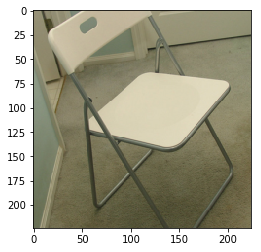

In [123]:
plt.imshow(arr[190].astype('uint8'))

In [127]:
# len(pred_wv)
all_syns, all_wvs = list(zip(*syn_wv))
all_wvs = np.array(all_wvs)
# len(syn_wv)

In [132]:
# all_wvs.shape
all_nn = LSHForest(20, n_neighbors=4).fit(all_wvs)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/approximate.py:220: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


In [135]:
%time dist, idxs = all_nn.kneighbors(pred_wv[:len(pred_wv)-1])
len(dist)

CPU times: user 3min 56s, sys: 2.65 s, total: 3min 58s
Wall time: 1min 58s


9999

In [138]:
# len(idxs)
[[classids[all_syns[id]] for id in ids] for ids in idxs[190:200]]

[['soap dispenser', 'tray', 'washtub', 'countertop'],
 ['rhinoceros beetle', 'sponge mop', 'hobnail', 'swizzle stick'],
 ['isopod', 'tadpole shrimp', 'water moccasin', 'auklet'],
 ['holster', 'holster', 'crescent wrench', 'lug wrench'],
 ['golden retriever', 'standard poodle', 'Brittany spaniel', 'fox terrier'],
 ['sponge mop', 'cloche', 'cloche', 'anchovy sauce'],
 ['pegboard', 'socket wrench', 'broom', 'broom'],
 ['bluetick', 'Brittany spaniel', 'milking shorthorn', 'miniature pinscher'],
 ['spaghettini', 'cracklings', 'spaghetti squash', 'spaghetti squash'],
 ['pancake turner', 'crescent wrench', 'lug wrench', 'stud finder']]

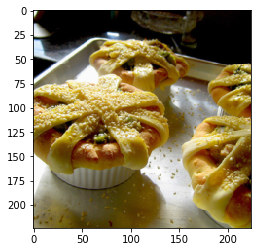

In [143]:
plt.imshow(arr[198].astype('uint8'))

In [166]:
lm_inp2 = Input(shape=(2048,))
lm2 = Model(lm_inp2, Dense(ndim)(lm_inp2))

In [167]:
# for l1, l2 in zip(lm.layers, lm2.layers): l2.set_weights(l1.get_weights())
# len(lm2.layers)

In [168]:
rn_bot_seq = Sequential([rn_bot, lm2])
rn_bot_seq.compile('adam', 'cosine_proximity')
rn_bot_seq.output_shape

(None, 300)

In [154]:
bc_it = BcolzArrayIterator(features_mid, vecs, shuffle=True, batch_size=128)

In [169]:
K.set_value(rn_bot_seq.optimizer.lr, 1e-5)

In [170]:
rn_bot_seq.fit(features_mid, vecs, verbose=2, nb_epoch=4)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/models.py:952: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/4
 - 24s - loss: -1.5848e-01
Epoch 2/4
 - 22s - loss: -3.2717e-01
Epoch 3/4
 - 22s - loss: -4.0830e-01
Epoch 4/4
 - 22s - loss: -4.6933e-01


In [171]:
K.set_value(rn_bot_seq.optimizer.lr, 1e-4)
rn_bot_seq.fit(features_mid, vecs, verbose=2, nb_epoch=8)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/models.py:952: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/8
 - 22s - loss: -7.0300e-01
Epoch 2/8
 - 22s - loss: -8.7968e-01
Epoch 3/8
 - 22s - loss: -9.2825e-01
Epoch 4/8
 - 22s - loss: -9.4804e-01
Epoch 5/8
 - 22s - loss: -9.5780e-01
Epoch 6/8
 - 22s - loss: -9.6290e-01
Epoch 7/8
 - 22s - loss: -9.6656e-01
Epoch 8/8
 - 22s - loss: -9.6863e-01


In [172]:
rn_bot_seq.evaluate(features_mid, vecs, verbose=2)

-0.98632088532126938

In [173]:
rn_bot_seq.save_weights(dpath+'results/rn_bot_seq_cos.h5')

In [175]:
rn_bot_seq.load_weights(dpath+'results/rn_bot_seq_cos.h5')

In [179]:
%time pred_wv = rn_bot_seq.predict(features_mid)

CPU times: user 2.34 s, sys: 156 ms, total: 2.5 s
Wall time: 4.46 s


In [181]:
dist, idxs = nn.kneighbors(pred_wv[slice(190,200)])

In [187]:
[[classids[syns[id]] for id in ids] for ids in idxs]

[['folding chair', 'rocking chair, rocker', 'chainlink fence', 'pillow'],
 ['centipede',
  'wolf spider, hunting spider',
  'sea anemone, anemone',
  'rhinoceros beetle'],
 ['cricket',
  'baseball',
  'basketball',
  'cinema, movie theater, movie theatre, movie house, picture palace'],
 ['holster',
  'revolver, six-gun, six-shooter',
  'backpack, back pack, knapsack, packsack, rucksack, haversack',
  'rifle'],
 ['papillon', 'standard poodle', 'Pekinese, Pekingese, Peke', 'schipperke'],
 ['broccoli', 'cauliflower', 'butternut squash', 'cucumber, cuke'],
 ['rain barrel', 'wine bottle', 'birdhouse', 'space heater'],
 ['tusker',
  'green mamba',
  'cheetah, chetah, Acinonyx jubatus',
  'impala, Aepyceros melampus'],
 ['potpie', 'butternut squash', 'consomme', 'mashed potato'],
 ['screw', 'screwdriver', "plunger, plumber's helper", 'spindle']]

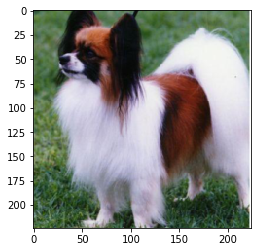

In [192]:
plt.imshow(arr[slice(190,200)][4].astype('uint8'))

In [193]:
## Text to Image

In [195]:
img_nn2 = LSHForest(20, n_neighbors=4).fit(pred_wv)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/approximate.py:220: DeprecationWarning: LSHForest has poor performance and has been deprecated in 0.19. It will be removed in version 0.21.
  DeprecationWarning)


In [196]:
word='car'
vec = w2v_dict[word]

In [200]:
dist, idxs = img_nn2.kneighbors(vec.reshape(1, -1))

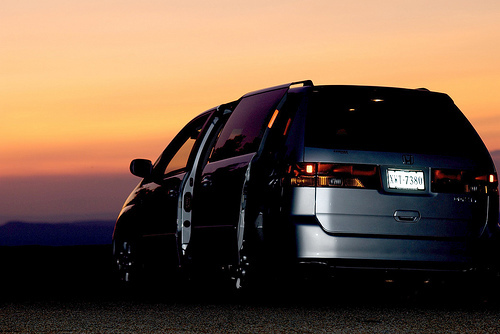

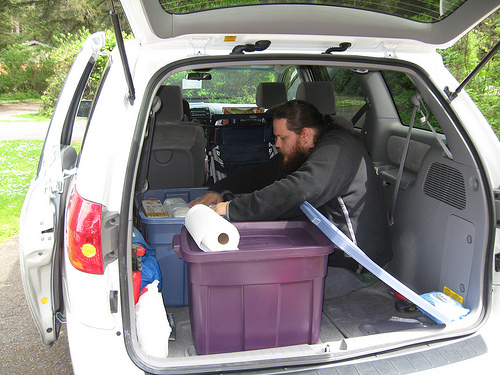

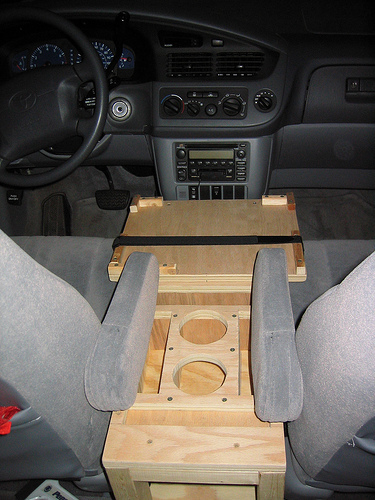

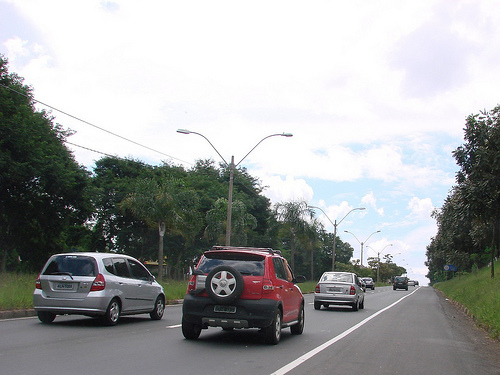

In [202]:
ims = [Image.open(fnames[fn%n]) for fn in idxs[0]]
display(*ims)